# MNIST Multi-Layer Perceptron

Multi Layer Perceptron model to try to classify hand written digits using TensorFlow.

MNIST data set of [handwritten digits](http://yann.lecun.com/exdb/mnist/). 

The images are black and white images of size 28 x 28 pixels, or 784 pixels total. Features will be the pixel values for each pixel. Either the pixel is "white" (blank with a 0), or there is some pixel value. 

In [22]:
# Import the libraries

# Numpy is the fundamental package for scientific computing with Python
import numpy as np

# Matplotlib is used for graphs
import matplotlib.pyplot as plt

# %matplotlib inline is magic command. This performs the necessary behind-the-scenes setup for IPython to work correctly hand in hand with matplotlib
%matplotlib inline

In [1]:
# Library to import MNIST Data
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
# Reading the data
mnist=input_data.read_data_sets('/tmp/data',one_hot=True)

Extracting /tmp/data\train-images-idx3-ubyte.gz
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz


In [3]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [4]:
# To see our data
sample=mnist.train.images[1022].reshape(28,28)

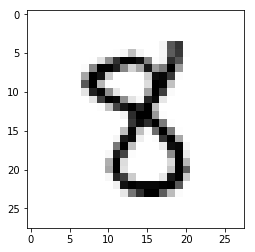

In [7]:
plt.imshow(sample,cmap='Greys')

In [8]:
# Parameters
# Learning Rate - How quickly to adjust the cost function.
# Training Epochs - How many training cycles to go through
# Batch Size - Size of the 'batches' of training data

learning_rate =0.01
training_epochs =15
batch_size =100

In [9]:
# Network Parameters
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)
n_samples = mnist.train.num_examples

In [14]:
def multilayer_perceptron(x, weights, biases):
    '''
    x : Place Holder for Data Input
    weights: Dictionary of weights
    biases: Dicitionary of biases
    '''
    
    # First Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [17]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [18]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [19]:
x=tf.placeholder('float',[None,n_input])
y=tf.placeholder('float',[None,n_classes])

In [20]:
# Construct model
pred = multilayer_perceptron(x, weights, biases)

In [21]:
# Define loss and optimizer
cost =tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))


In [22]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [23]:
t=mnist.train.next_batch(10)

In [24]:
Xsamp,ysamp = mnist.train.next_batch(1)

In [25]:
# Launch the session
sess = tf.InteractiveSession()
init = tf.initialize_all_variables()
# Intialize all the variables
sess.run(init)

# Training Epochs
# Essentially the max amount of loops possible before we stop
# May stop earlier if cost/loss limit was set
for epoch in range(training_epochs):

    # Start with cost = 0.0
    avg_cost = 0.0

    # Convert total number of batches to integer
    total_batch = int(n_samples/batch_size)

    # Loop over all batches
    for i in range(total_batch):

        # Grab the next batch of training data and labels
        batch_x, batch_y = mnist.train.next_batch(batch_size)

        # Feed dictionary for optimization and loss value
        # Returns a tuple, but we only need 'c' the cost
        # So we set an underscore as a "throwaway"
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})

        # Compute average loss
        avg_cost += c / total_batch

    print("Epoch: {} cost={:.4f}".format(epoch+1,avg_cost))

print("Model has completed {} Epochs of Training".format(training_epochs))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch: 1 cost=47.2376
Epoch: 2 cost=8.5407
Epoch: 3 cost=4.7683
Epoch: 4 cost=3.2909
Epoch: 5 cost=2.6277
Epoch: 6 cost=2.4564
Epoch: 7 cost=1.9550
Epoch: 8 cost=1.7337
Epoch: 9 cost=1.5574
Epoch: 10 cost=1.4798
Epoch: 11 cost=1.2893
Epoch: 12 cost=1.0913
Epoch: 13 cost=0.9235
Epoch: 14 cost=1.0144
Epoch: 15 cost=0.8712
Model has completed 15 Epochs of Training


In [73]:
# Test model
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

In [74]:
print(correct_predictions[0])

Tensor("strided_slice:0", shape=(), dtype=bool)


In [75]:
correct_predictions = tf.cast(correct_predictions, "float")

In [76]:
accuracy = tf.reduce_mean(correct_predictions)

In [77]:
mnist.test.labels

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [78]:
mnist.test.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [79]:
print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Accuracy: 0.963
